# Bank Churn Prediction And Segmentation

## load dataset

In [1]:
import numpy as np
import pandas as pd
# Load Dataset Dictionary
data_dictionary = pd.read_csv("Bank_Churn_Data_Dictionary.csv")
data_dictionary

,Field,Description
0,CustomerId,A unique identifier for each customer
1,Surname,The customer's last name
2,CreditScore,A numerical value representing the customer's ...
3,Geography,The country where the customer resides (France...
4,Gender,The customer's gender (Male or Female)
5,Age,The customer's age
6,Tenure,The number of years the customer has been with...
7,Balance,The customer's account balance
8,NumOfProducts,The number of bank products the customer uses ...
9,HasCrCard,Whether the customer has a credit card (1 = ye...


In [1]:
import pandas as pd
# Load the data
data = pd.read_csv("Bank_Churn.csv")

In [3]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [5]:
data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Objective of The Project

### The Followings Question will be Answered
#### 1. What attributes are more common among churners than non-churners?
#### 2. Can churn be predicted using the variables in the data?
#### 3. What do the overall demographics of the bank’s customers look like?
#### 4. Is there a difference between German, French, and Spanish customers in terms of account behavior?
#### 5. What types of segments exist within the bank’s customers?

## >What attributes are more common among churners than non-churners? 
#### Divide the data into two groups: churners (Exited = 1) and non-churners (Exited = 0)
#### Exploratory Data Analysis (EDA): Compare the distributions of each feature across churners and non-churners to identify commonalities among churners.
####   * Compare distributions for numerical features
####   * Compare categorical features (e.g., Geography, Gender)
#### Statistical Analysis: Use statistical tests (like t-tests for numerical features and chi-square tests for categorical features) to determine if differences are significant.

In [7]:
# Divide data into churners and non-churners
churners = data[data['Exited'] == 1]
retention = data[data['Exited'] == 0]

# Create age intervals
age_bins = [18, 30, 45, 60, 95]  # Define the bins
age_labels = ['18-30', '31-45', '46-60', '60+']
data['AgeInterval'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

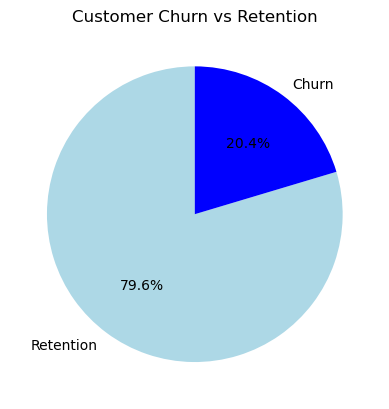

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
# Map 1 and 0 to 'Churn' and 'Retention'
label_mapping = {1: 'Churn', 0: 'Retention'}
data['Status_label'] = data['Exited'].map(label_mapping)

# Count the occurrences of each label
label_counts = data['Status_label'].value_counts()
custom_colors = ['lightblue', 'blue']

# Plot the pie chart
plt.pie(label_counts, labels=label_counts.index, colors=custom_colors, autopct='%1.1f%%', startangle=90)
plt.title('Customer Churn vs Retention')
plt.show()

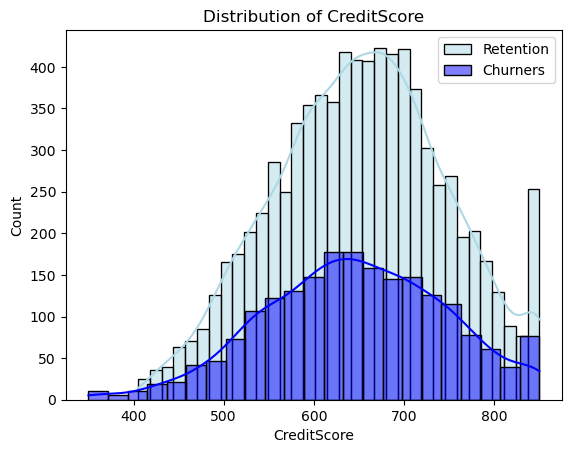

CreditScore: p-value = 0.006738213892192373
The attribute CreditScore is statistically significant among churners than non-churners.


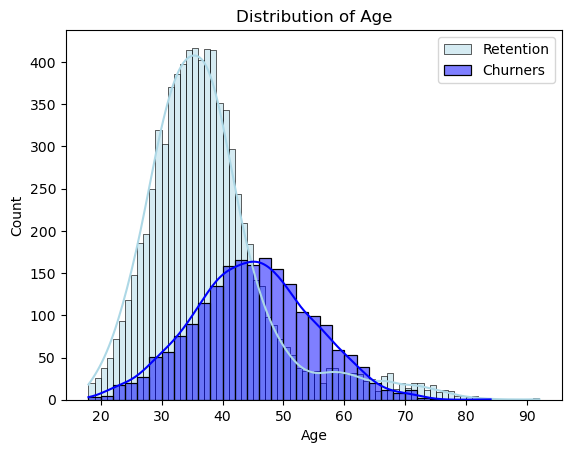

Age: p-value = 1.2399313093427736e-186
The attribute Age is statistically significant among churners than non-churners.


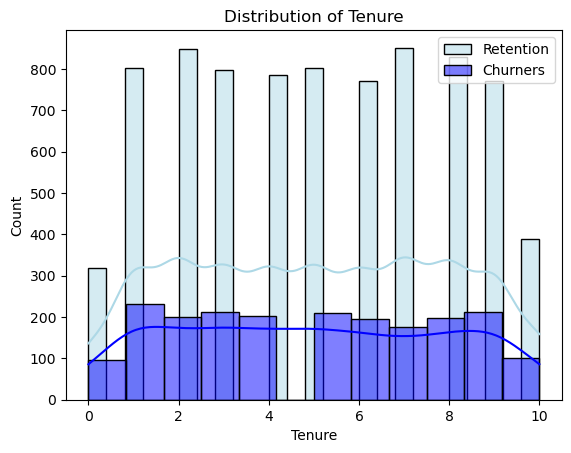

Tenure: p-value = 0.16152684949473256
The attribute Tenure is not statistically significant among churners than non-churners.


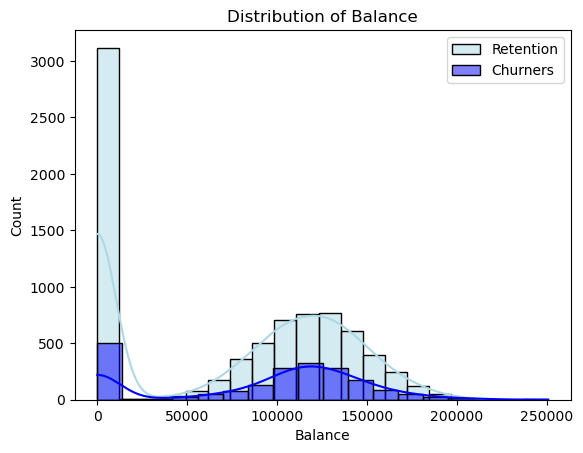

Balance: p-value = 1.2755633191525475e-32
The attribute Balance is statistically significant among churners than non-churners.


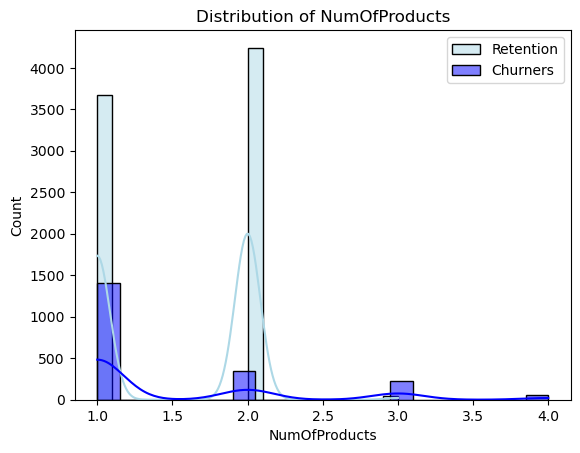

NumOfProducts: p-value = 1.717333004804293e-06
The attribute NumOfProducts is statistically significant among churners than non-churners.


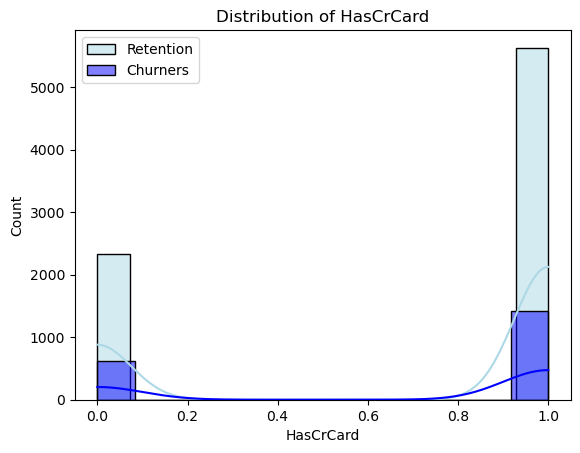

HasCrCard: p-value = 0.47541491837605643
The attribute HasCrCard is not statistically significant among churners than non-churners.


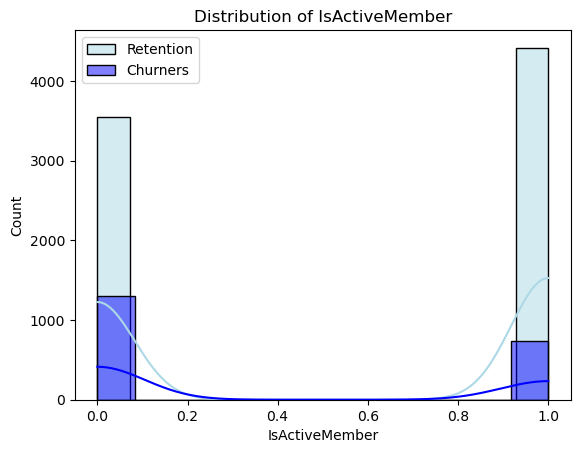

IsActiveMember: p-value = 1.348268516485762e-55
The attribute IsActiveMember is statistically significant among churners than non-churners.


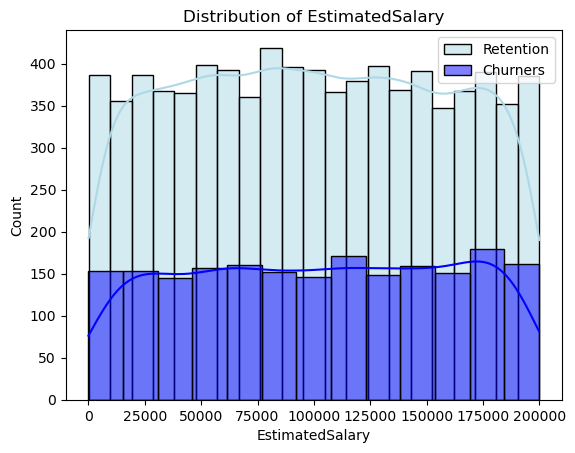

EstimatedSalary: p-value = 0.22644042802223352
The attribute EstimatedSalary is not statistically significant among churners than non-churners.


In [56]:
from scipy.stats import ttest_ind, chi2_contingency

# Compare distributions for numerical features
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
alpha = 0.05
for col in numerical_cols:
    plt.figure()
    sns.histplot(retention[col], color="lightblue", label= "Retention", kde=True)
    sns.histplot(churners[col], color="blue", label= "Churners", kde=True)
    plt.title(f"Distribution of {col}")
    plt.legend()
    plt.show()
     # Statistical test (t-test for numerical variables)
    t_stat, p_val = ttest_ind(churners[col], retention[col])
    print(f"{col}: p-value = {p_val}")
     # check for significance
    if p_val < alpha:
        print(f"The attribute {col} is statistically significant among churners than non-churners.")
    else:
        print(f"The attribute {col} is not statistically significant among churners than non-churners.")

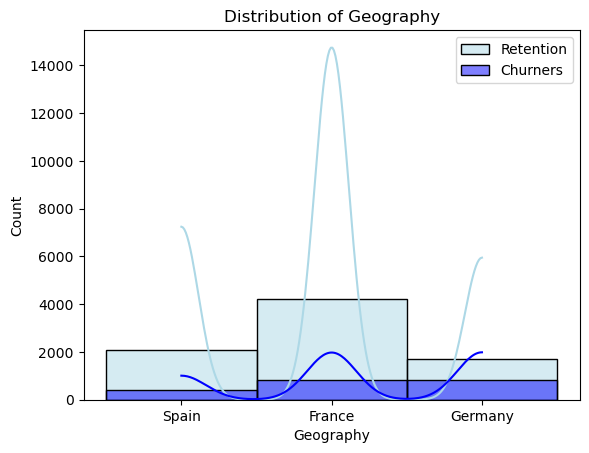

Geography: p-value = 3.8303176053541544e-66
The attribute Geography is statistically significant among churners than non-churners.


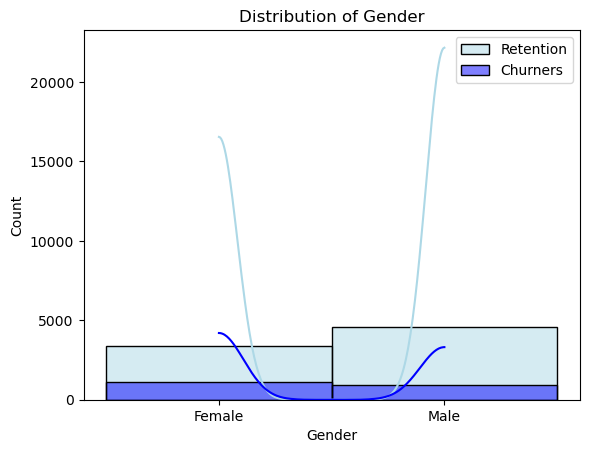

Gender: p-value = 2.2482100097131755e-26
The attribute Gender is statistically significant among churners than non-churners.


In [58]:
# Compare categorical features (e.g., Geography, Gender)
categorical_cols = ['Geography', 'Gender']
alpha = 0.05
for col in categorical_cols:
    plt.figure()
    sns.histplot(retention[col], color="lightblue", label="Retention", kde=True)
    sns.histplot(churners[col], color="blue", label="Churners", kde=True)
    plt.title(f"Distribution of {col}")
    plt.legend()
    plt.show()
    contingency_table = pd.crosstab(data[col], data['Exited'])
    chi2, p_val, _, _ = chi2_contingency(contingency_table)
    print(f"{col}: p-value = {p_val}")
    # check for significance
    if p_val < alpha:
        print(f"The attribute {col} is statistically significant among churners than non-churners.")
    else:
        print(f"The attribute {col} is not statistically significant among churners than non-churners.")

## >Can churn be predicted using the variables in the data
#### To determine if churn can be predicted, we can train a classification model (e.g., logistic regression, random forest) using the features.

### Steps:

#### Data Preprocessing: Encode categorical variables, scale numerical ones, and split the dataset into training and testing sets.
#### Model Training: Train several models and compare their performance to see if we can predict churn effectively.
#### Model Evaluation: Use metrics like accuracy, F1-score, and AUC to evaluate model performance.

In [23]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeInterval,Status_label
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,31-45,Churn
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,31-45,Retention
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,31-45,Churn
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,31-45,Retention
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,31-45,Retention


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

#Perform Feature Scaling on 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 
#in order to bring them on same scale
standardScaler = StandardScaler()
data_scaling = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

#Apply the feature scaling operation on dataset using fit_transform() method
data[data_scaling] = standardScaler.fit_transform(data[data_scaling])

# Encode categorical features and split data
df_encoded = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)
X = df_encoded.drop(['Exited', 'CustomerId', 'Surname', 'Status_label', 'AgeInterval'], axis=1)
y = df_encoded['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8666666666666667
F1 Score: 0.5771670190274841
AUC Score: 0.8549396715957543
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.75      0.47      0.58       584

    accuracy                           0.87      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.86      0.87      0.85      3000

[[2327   89]
 [ 311  273]]


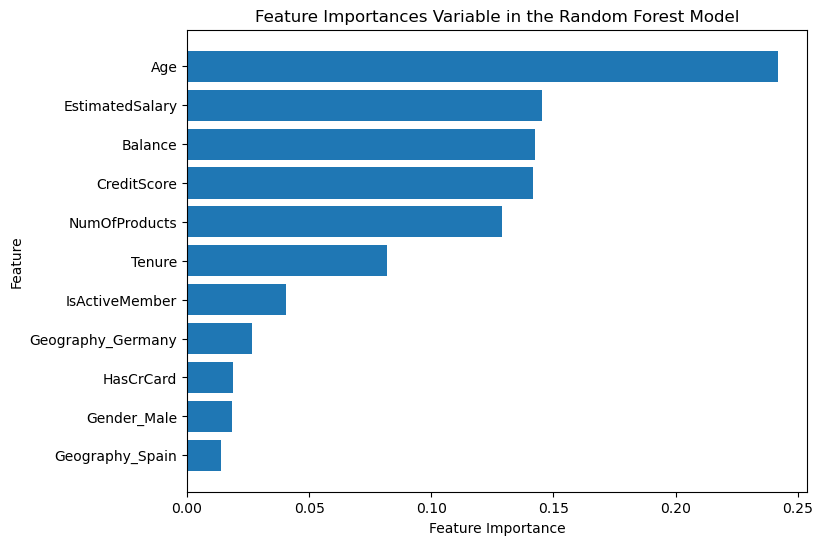

In [25]:
# Get the feature importances
impotances = model.feature_importances_
indices = np.argsort(impotances)[::-1]
feature_names = [X.columns[i] for i in indices]
# plot feature importances
plt.figure(figsize=(8,6))
plt.barh(range(X.shape[1]), impotances[indices], align='center')
plt.yticks(range(X.shape[1]), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances Variable in the Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

## >What do the overall demographics of the bank's customers look like?
#### To understand demographics, focus on analyzing distributions of key demographic features such as age, gender, geography, etc.

### Steps:

#### Distribution Analysis: Plot histograms or box plots for age, gender, and geography to understand the customer base.
#### Summary Statistics: Use descriptive statistics (e.g., mean, median, mode) to summarize the demographics.

In [38]:
def plot_stacked_bar_chart(data, 
                           group_by, 
                           target_col, 
                           colormap='tab10', 
                           figsize=(10, 6), 
                           title=None, 
                           legend_loc="lower left", 
                           bar_width=0.8, 
                           handle_na=True):
  
    # Handle missing values if required
    if handle_na:
        data = data.dropna(subset=[group_by, target_col])

    # Create a cross-tabulation of the data
    cross_tab = pd.crosstab(data[group_by], data[target_col])
    cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)

    # Plot the stacked bar chart
    ax = cross_tab_prop.plot(kind='bar', 
                             stacked=True, 
                             colormap=colormap, 
                             figsize=figsize, 
                             width=bar_width)

    # Set plot labels and title
    if title:
        plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(group_by, fontsize=14)
    plt.ylabel("Proportion", fontsize=14)

    # Customize legend
    plt.legend(loc=legend_loc, title=target_col, fontsize=10, title_fontsize=12)

    # Add text annotations for proportions
    for n, x in enumerate(cross_tab.index.values):
        for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                       cross_tab_prop.loc[x].cumsum()):
            plt.text(x=n - 0.17,
                     y=y_loc - proportion / 2,
                     s=f'{np.round(proportion * 100, 1)}%', 
                     color="white" if proportion > 0.15 else "black", 
                     fontsize=10, 
                     ha='center', 
                     va='center',
                     fontweight="bold")

    plt.tight_layout()
    plt.show()

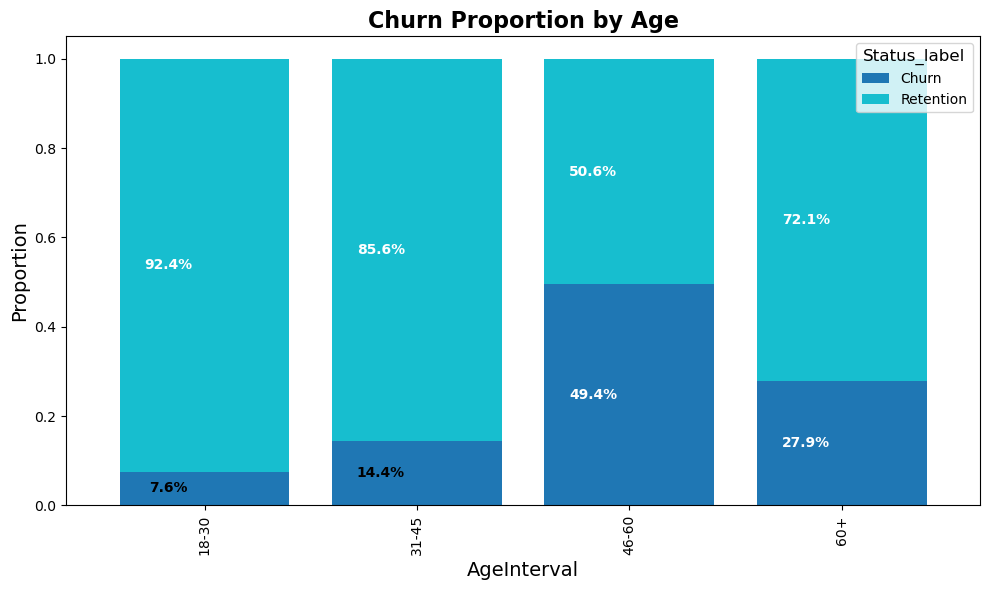

In [40]:
# Plot for 'Age' grouped by 'churn_label' with missing values handled
plot_stacked_bar_chart(
    data, 
    group_by='AgeInterval', 
    target_col='Status_label', 
    title='Churn Proportion by Age',
    legend_loc='upper right'
)

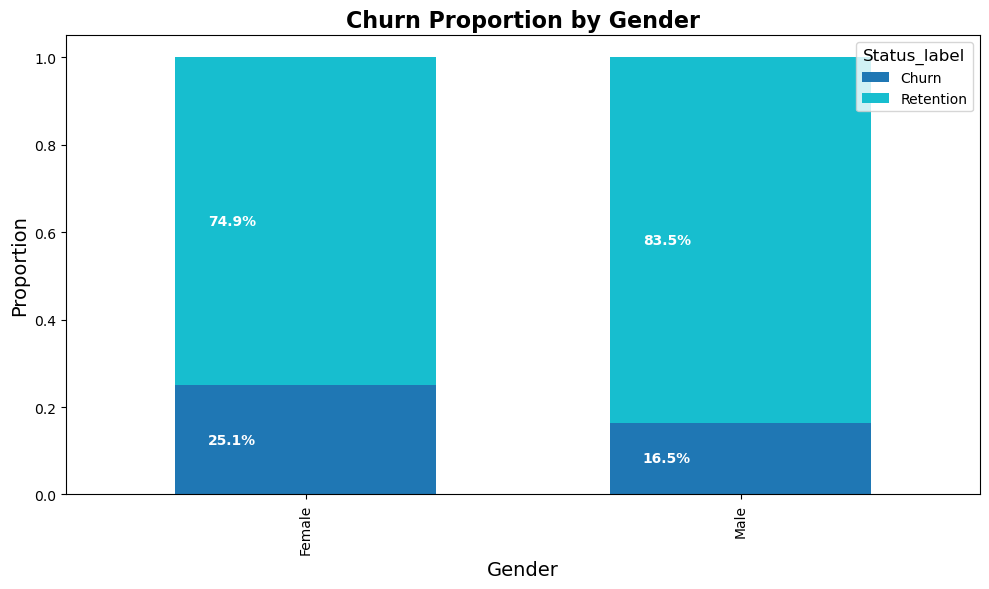

In [42]:
# Plot for 'Gender' grouped by 'churn_label'
plot_stacked_bar_chart(
    data, 
    group_by='Gender', 
    target_col='Status_label', 
    title='Churn Proportion by Gender',
    bar_width=0.6,
    legend_loc='upper right'
)

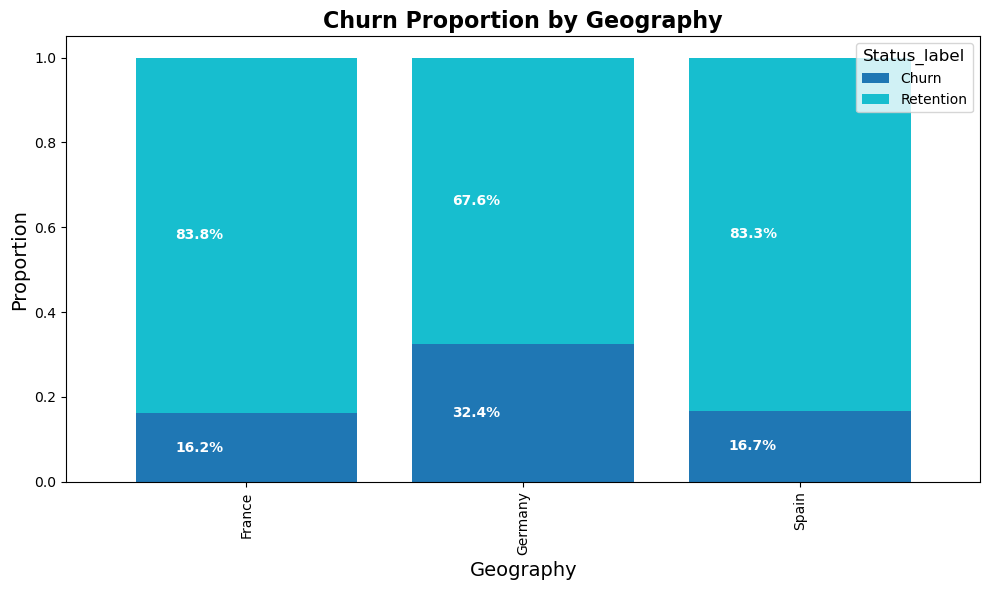

In [53]:
# Plot for 'Geography' grouped by 'churn_label'
plot_stacked_bar_chart(
    data, 
    group_by='Geography', 
    target_col='Status_label', 
    title='Churn Proportion by Geography',
     legend_loc='upper right'
)

## >Is there a difference between German, French, and Spanish customers in terms of account behavior?
#### To assess account behavior differences by geography:

### Steps:

#### Segment Analysis: Group data by Geography and compute summary statistics or plots for behavioral variables (e.g., Balance, NumOfProducts, IsActiveMember).
#### Statistical Testing: Use ANOVA or chi-square tests to assess significant differences.

In [56]:
# Group by geography and summarize behavior-related attributes
behavior_cols = ['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
alpha = 0.05
geo_summary = data.groupby('Geography')[behavior_cols].mean()
print(geo_summary)

# ANOVA for numerical variables
from scipy.stats import f_oneway

for col in ['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']:
    f_stat, p_val = f_oneway(data[data['Geography'] == 'Germany'][col],
                             data[data['Geography'] == 'France'][col],
                             data[data['Geography'] == 'Spain'][col])
    print(f"{col}: p-value = {p_val}")
     # check for significance
    if p_val < alpha:
        print(f"There is statistically significant difference between German, French, and Spanish customers in terms of account behavior {col}.")
    else:
        print(f"There is not statistically significant difference between German, French, and Spanish customers in terms of account behavior {col}.")

           CreditScore    Tenure   Balance  NumOfProducts  HasCrCard  \
Geography                                                              
France       -0.008903 -0.002840 -0.230682       0.001227   0.002460   
Germany       0.009568 -0.000981  0.693080      -0.018003   0.018275   
Spain         0.008330  0.006742 -0.235081       0.015753  -0.023492   

           IsActiveMember  
Geography                  
France           0.003308  
Germany         -0.035397  
Spain            0.029159  
CreditScore: p-value = 0.6707197151786737
There is not statistically significant difference between German, French, and Spanish customers in terms of account behavior CreditScore.
Tenure: p-value = 0.925249785691543
There is not statistically significant difference between German, French, and Spanish customers in terms of account behavior Tenure.
Balance: p-value = 0.0
There is statistically significant difference between German, French, and Spanish customers in terms of account behavior Balanc

## >What types of segments exist within the bank's customers?
#### For segmentation, apply clustering algorithms (e.g., K-Means) to identify different customer groups.

### Steps:

#### Data Preparation: Select relevant features and standardize them.
#### Clustering: Use K-Means to cluster customers into segments.
#### Interpretation: Analyze each cluster's characteristics to understand the segments.

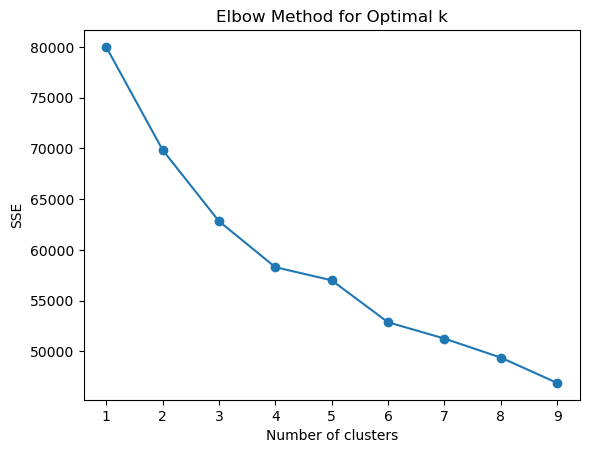

In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select and scale features
features = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'IsActiveMember', 'Tenure', 'HasCrCard']
scaler = StandardScaler()
features_scaled = scaler.fit_transform(data[features])

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

In [61]:
# Apply K-Means From the elbow plot, assume the optimal k = . We fit the model
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)


In [63]:
# Analyze clusters
cluster_summary = data.groupby('Cluster')[features].mean().T
cluster_summary

Cluster,0,1,2,3
CreditScore,0.012851,-0.041357,0.008883,0.019495
Age,0.085466,-0.026593,0.014463,-0.085859
Balance,0.465824,0.438967,0.035741,-1.055878
NumOfProducts,-0.424420,-0.469007,-0.054592,1.067316
EstimatedSalary,-0.022580,0.018933,0.015096,-0.015402
IsActiveMember,0.970243,-1.030670,0.019136,0.021197
Tenure,-0.034895,0.030465,-0.035080,0.051867
HasCrCard,0.646092,0.646092,-1.547768,0.600199


In [68]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(features_scaled, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.12222049392191985


### Cluster 0: Active, middle-aged, financially stable customers with strong credit scores and good engagement.
### Cluster 1: Younger, inactive members with good salaries, high balances, and fewer products. Likely disengaged despite financial stability.
### Cluster 2: Mid-aged customers with high salaries, moderate balances, mixed activity levels, and no credit cards. Likely a transitional group with modest engagement.
### Cluster 3: Younger customers with low balances but higher engagement through multiple products and credit card usage. Likely a high-utilization group.

## Recommendations for Each Cluster:
### Cluster 0: Active and Financially Stable Customers
#### Focus Area: Retention and Upselling
#### Upsell Premium Products: Offer higher-value products like investment accounts, insurance, or premium credit cards tailored to their financial stability.
#### Loyalty Rewards: Introduce loyalty programs to retain these high-value, active customers.
#### Proactive Support: Provide personalized financial advice and support to further deepen engagement.
### Cluster 1: Disengaged but Financially Stable Customers
#### Focus Area: Engagement and Activation
#### Personalized Offers: Recommend products that align with their high income and balance, such as wealth management services.
### Cluster 2: Mixed Activity, Moderate Balance, No Credit Cards
#### Focus Area: Encouraging Product Adoption
#### Introduce Credit Card Offers: Promote credit card products with attractive rewards or low-interest rates to encourage adoption.
#### Engagement Drives: Focus on converting the inactive members to active ones by demonstrating the benefits of bank products.
#### Cross-Selling: Suggest complementary products, such as savings accounts linked to their salary or investment options.
### Cluster 3: Young, Multi-Product, Low Balance Customers
#### Focus Area: Balance Building and Retention
#### Financial Education: Provide resources or workshops to help these customers manage their finances and grow their balances.
#### Targeted Savings Plans: Offer automated savings or investment plans tailored to their medium salary range.
#### Upsell Additional Products: Promote bundled products (e.g., travel or cashback credit cards) to leverage their willingness to use multiple products.